In [1]:
# DICE SM - Exploration & Global Sensitivity Analysis
# Shridhar


  ## Setup & Initialisation of levers and uncertainties

In [23]:
import time

import matplotlib.pyplot as plt
from ema_workbench import (Model, RealParameter, IntegerParameter, ArrayOutcome, 
                           ema_logging, SequentialEvaluator,
                           MultiprocessingEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)
# from ema_workbench.analysis import pairs_plotting
# from PyDICE_V4_array_outcome import PyDICE
from dicemodel.MyDICE_v3 import PyDICE

In [24]:

if __name__ == '__main__':
    ema_logging.log_to_stderr(ema_logging.INFO)
    

    model = PyDICE()
    dice_sm = Model('dicesmEMA', function=model)
    
    dice_sm.uncertainties = [IntegerParameter('t2xco2_index', 0, 999),
                             IntegerParameter('t2xco2_dist',0,2),

                             RealParameter('tfp_gr',  0.07, 0.09),
                             RealParameter('sigma_gr', -0.012, -0.008),
                             RealParameter('pop_gr', 0.1, 0.15),
                             RealParameter('fosslim',  4000.0, 13649),
                             IntegerParameter('cback', 100, 600)]
    
    dice_sm.levers = [RealParameter('sr', 0.1, 0.5),
                      RealParameter('prtp_con',  0.001, 0.015),
                      RealParameter('prtp_dam',  0.001, 0.015),
                      RealParameter('emuc',  0.5, 1.5),
                      RealParameter('emdd',  0.5, 1.5),
                      IntegerParameter('periodfullpart', 10, 58),
                      IntegerParameter('miu_period', 10, 58)]
    
    dice_sm.outcomes = [ArrayOutcome('Atmospheric Temperature'),
                        ArrayOutcome('Damages'),
                        ArrayOutcome('Utility of Consumption'),
                        ArrayOutcome('Savings rate'),
                        ArrayOutcome('Disutility of Damage'),
                        ArrayOutcome('Damage to output ratio'),
                        ArrayOutcome('Welfare'),
                        ArrayOutcome('Total Output')]
    
    
    n_scenarios = 100
    n_policies = 10


In [25]:
    start = time.time()
    with MultiprocessingEvaluator(dice_sm, n_processes=8) as evaluator:
        experiments, outcomes = evaluator.perform_experiments(scenarios=n_scenarios,policies=n_policies)
    end = time.time()
    
    print('Experiment time is ' + str(round((end - start)/60)) + ' mintues')

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 100 scenarios * 10 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


Experiment time is 5 mintues


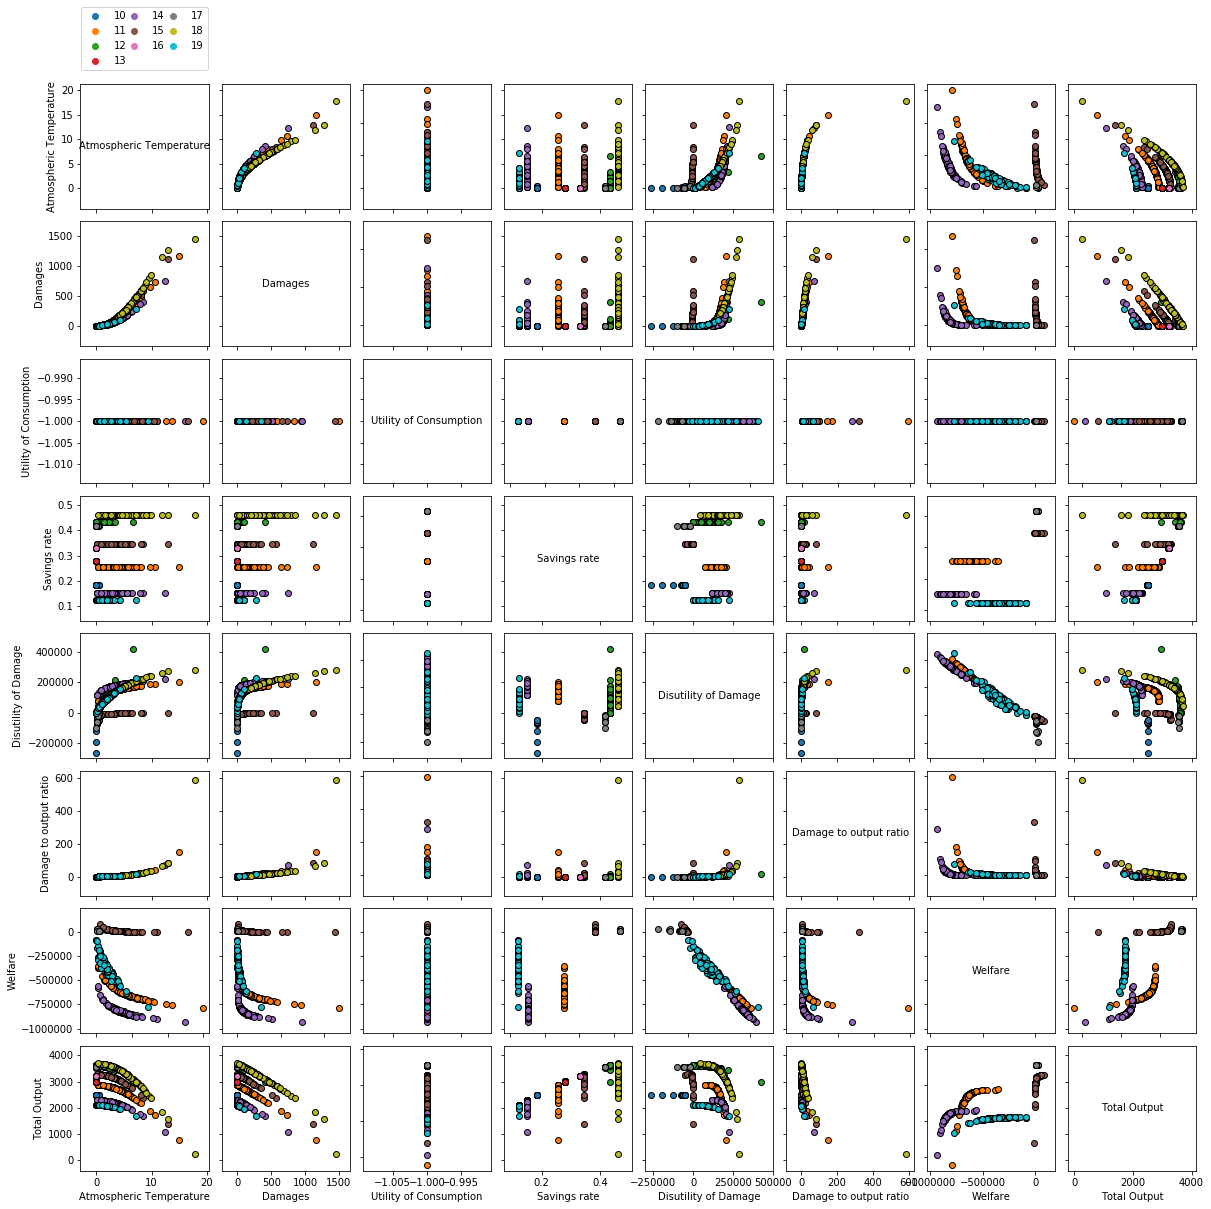

In [26]:
from ema_workbench.analysis import pairs_plotting
fig, axes = pairs_plotting.pairs_scatter(experiments,outcomes, group_by='policy',legend=True)
fig.set_size_inches(20,20)
plt.show()

In [5]:
print(outcomes)

{'Atmospheric Temperature': array([[0.8       , 0.95696708, 1.1212136 , ..., 0.        , 0.        ,
        0.        ],
       [0.8       , 0.95138498, 1.10999588, ..., 0.        , 0.        ,
        0.        ],
       [0.8       , 0.94262225, 1.09140995, ..., 0.30405728, 0.24604285,
        0.18984219],
       ...,
       [0.8       , 0.98781501, 1.18665353, ..., 4.47264832, 4.35069752,
        4.2289266 ],
       [0.8       , 0.91869382, 1.0422102 , ..., 1.20111721, 1.14019232,
        1.08085125],
       [0.8       , 0.96930217, 1.14712302, ..., 2.33374021, 2.17902778,
        2.02425868]]), 'Damages': array([[  0.1086489 ,   0.17610722,   0.27563479, ...,   0.        ,
          0.        ,   0.        ],
       [  0.1086489 ,   0.17463258,   0.27182635, ...,   0.        ,
          0.        ,   0.        ],
       [  0.1086489 ,   0.17187642,   0.26407887, ...,   0.59312847,
          0.39676735,   0.24115458],
       ...,
       [  0.1086489 ,   0.17945844,   0.28480212, ...

In [27]:
from ema_workbench.analysis import prim
from ema_workbench.analysis import scenario_discovery_util as sdutil
from sklearn import preprocessing 
import numpy as np
x = experiments
# outcome is nd-array, PRIM needs 1D
y = outcomes
# y = np.amax(outcomes['Atmospheric Temperature'], axis =1) 
y

{'Atmospheric Temperature': array([[0.8       , 0.95696708, 1.1212136 , ..., 0.        , 0.        ,
         0.        ],
        [0.8       , 0.95138498, 1.10999588, ..., 0.        , 0.        ,
         0.        ],
        [0.8       , 0.94262225, 1.09140995, ..., 0.30405728, 0.24604285,
         0.18984219],
        ...,
        [0.8       , 0.98781501, 1.18665353, ..., 4.47264832, 4.35069752,
         4.2289266 ],
        [0.8       , 0.91869382, 1.0422102 , ..., 1.20111721, 1.14019232,
         1.08085125],
        [0.8       , 0.96930217, 1.14712302, ..., 2.33374021, 2.17902778,
         2.02425868]]),
 'Damages': array([[  0.1086489 ,   0.17610722,   0.27563479, ...,   0.        ,
           0.        ,   0.        ],
        [  0.1086489 ,   0.17463258,   0.27182635, ...,   0.        ,
           0.        ,   0.        ],
        [  0.1086489 ,   0.17187642,   0.26407887, ...,   0.59312847,
           0.39676735,   0.24115458],
        ...,
        [  0.1086489 ,   0.1794584

In [29]:
len(y)

8

In [22]:

# y = np.amax(y)
# # y = y < 3 * 60
# y
# len(y)

x.shape

(1000, 16)

In [9]:
x

,cback,fosslim,pop_gr,sigma_gr,t2xco2_dist,t2xco2_index,tfp_gr,emdd,emuc,miu_period,periodfullpart,prtp_con,prtp_dam,sr,scenario,policy,model
0,159.0,5440.730690,0.119800,-0.010698,2.0,531.0,0.083939,1.196032,1.445687,22.0,54.0,0.006694,0.002877,0.183362,0,0,dicesmEMA
1,455.0,5187.422628,0.130765,-0.008080,0.0,642.0,0.082917,1.196032,1.445687,22.0,54.0,0.006694,0.002877,0.183362,1,0,dicesmEMA
2,152.0,13429.033241,0.139417,-0.011569,0.0,55.0,0.079430,1.196032,1.445687,22.0,54.0,0.006694,0.002877,0.183362,2,0,dicesmEMA
3,176.0,8246.563343,0.140531,-0.009016,1.0,800.0,0.082747,1.196032,1.445687,22.0,54.0,0.006694,0.002877,0.183362,3,0,dicesmEMA
4,173.0,7890.660260,0.127429,-0.010609,2.0,125.0,0.083532,1.196032,1.445687,22.0,54.0,0.006694,0.002877,0.183362,4,0,dicesmEMA
5,231.0,5996.149866,0.146785,-0.011686,0.0,501.0,0.085657,1.196032,1.445687,22.0,54.0,0.006694,0.002877,0.183362,5,0,dicesmEMA
6,246.0,7564.346420,0.129889,-0.010269,1.0,69.0,0.086704,1.196032,1.445687,22.0,54.0,0.006694,0.002877,0.183362,6,0,dicesmEMA
7,384.0,13521.392230,0.144089,-0.008853,1.0,386.0,0.075227,1.196032,1.445687,22.0,54.0,0.006694,0.002877,0.183362,7,0,dicesmEMA
8,340.0,11619.862638,0.135330,-0.009218,0.0,434.0,0.078053,1.196032,1.445687,22.0,54.0,0.006694,0.002877,0.183362,8,0,dicesmEMA
9,502.0,6878.336013,0.110820,-0.008338,0.0,327.0,0.071634,1.196032,1.445687,22.0,54.0,0.006694,0.002877,0.183362,9,0,dicesmEMA


In [58]:
classify_prim = outcomes['Atmospheric Temperature']
classify_prim

array([[0.8       , 0.95696708, 1.1212136 , ..., 0.        , 0.        ,
        0.        ],
       [0.8       , 0.95138498, 1.10999588, ..., 0.        , 0.        ,
        0.        ],
       [0.8       , 0.94262225, 1.09140995, ..., 0.30405728, 0.24604285,
        0.18984219],
       ...,
       [0.8       , 0.98781501, 1.18665353, ..., 4.47264832, 4.35069752,
        4.2289266 ],
       [0.8       , 0.91869382, 1.0422102 , ..., 1.20111721, 1.14019232,
        1.08085125],
       [0.8       , 0.96930217, 1.14712302, ..., 2.33374021, 2.17902778,
        2.02425868]])

In [63]:
prim_setup = prim.setup_prim(x, classify = outcomes['Atmospheric Temperature'], threshold = 0.8,)


ValueError: too many values to unpack (expected 2)

In [31]:
prim_alg = prim.Prim(x, y, axis =1)), threshold=0.8, peel_alpha = 0.1)
box1 = prim_alg.find_box()

TypeError: __init__() got an unexpected keyword argument 'classify'

In [85]:
box1.show_tradeoff()
plt.show()

NameError: name 'box1' is not defined